<a href="https://colab.research.google.com/github/DrewFinley/IMSE-541-HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import statistics
import numpy as np
import scipy.stats 
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as sm
import seaborn as sns

# 4.35

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/Table4E.4.csv', sep=',' , na_values='.')
data

,Observation,Flow,Uniformity
0,1,125,2.7
1,2,125,2.6
2,3,125,4.6
3,4,125,3.2
4,5,125,3.0
5,6,125,3.8
6,7,160,4.6
7,8,160,4.9
8,9,160,5.0
9,10,160,4.2


In [3]:
Flow125 = data[data['Flow']==125]['Uniformity']
Flow160 = data[data['Flow']==160]['Uniformity']
Flow200 = data[data['Flow']==200]['Uniformity']


In [4]:
# A
stat, p=f_oneway(Flow125, Flow160, Flow200)
print('stat=%.3f, p=%.3f' %(stat,p))

stat=3.586, p=0.053


The p value is greater than .05, fail to reject, so evidence exists that the uniformity is impacted by the flow. 

In [5]:
df=data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  18 non-null     int64  
 1   Flow         18 non-null     int64  
 2   Uniformity   18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


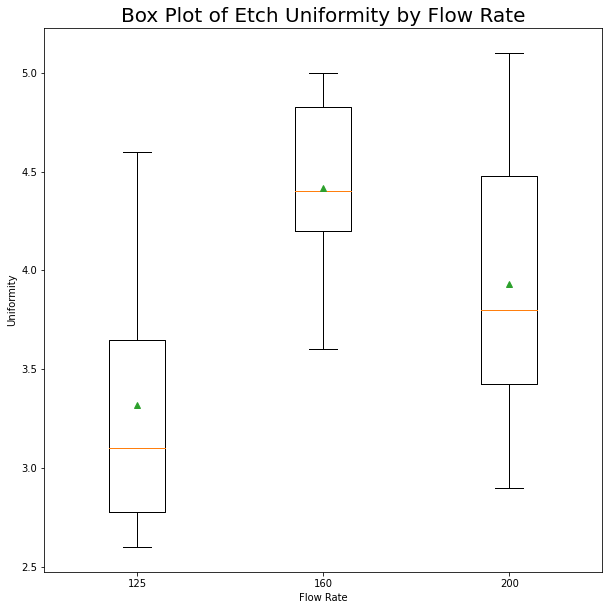

In [6]:
# B
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Etch Uniformity by Flow Rate", fontsize= 20)
ax.set

#data2 = [df['Strength'][df['Conc'] == 5],
#             df['Strength'][df['Conc'] == 10],
#             df['Strength'][df['Conc'] == 15],
#             df['Strength'][df['Conc'] == 20]]

data2=[Flow125, Flow160, Flow200]

ax.boxplot(data2,
           labels= ['125', '160', '200'],
           showmeans= True)

plt.xlabel("Flow Rate")
plt.ylabel("Uniformity")

plt.show()

A flow rate of 125 is best because it produces the lowest average etch uniformity percentage making it the best choice of the three flow rates.

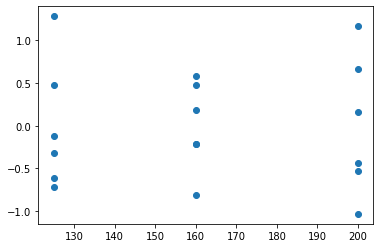

In [7]:
# C
model = ols('Uniformity ~ C(Flow)', data=df).fit()

residuals=model.resid

treatment=data['Flow']

plt.scatter(treatment, residuals)

plt.show()

There are no unusual patterns in this plot. The variances appear to span a similar distance and are therefore approximately equal.  

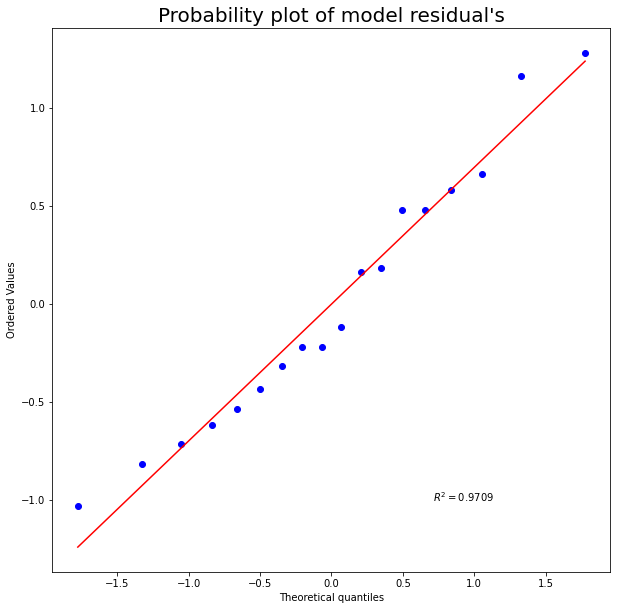

In [8]:
# D
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

The assumption of normality is reasonable based on the fit of the line. 

# 4.36

In [14]:
mean1 = statistics.mean(Flow125)
mean2 = statistics.mean(Flow160)
mean3 =statistics.mean(Flow200)
print(mean1, mean2, mean3)
mean_total = (mean1 + mean2 + mean3)/3
print(mean_total)

3.3166666666666664 4.416666666666667 3.933333333333333
3.888888888888889


The SSE is the difference squared between all the observations and the total mean, 3.889. Calculating this results in an SSE of 11.2778. The MSE is the SSE divided by a(n-1) degrees of freedom or in this case 3(6-1) or 15. So the MSE is .7519. Lastly the scaled factor is the square root of the MSE divided by n, equalling .353. 

In [10]:
comp = mc.MultiComparison(df['Uniformity'], df['Flow'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
125,160,1.1,0.0434,0.0309,2.1691,True
125,200,0.6167,0.3201,-0.4525,1.6858,False
160,200,-0.4833,0.4872,-1.5525,0.5858,False


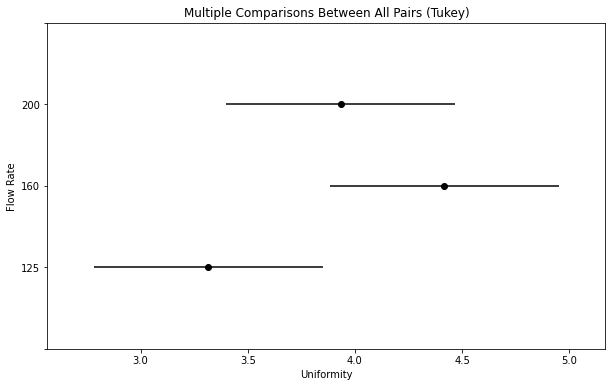

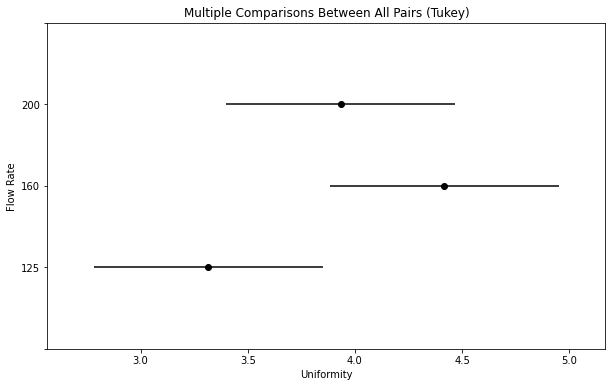

In [11]:
post_hoc_res.plot_simultaneous(ylabel= "Flow Rate", xlabel= "Uniformity")

Looking at the graph it does not appear that there is a large difference between the mean etch uniformity of the three flow rates. 

# 4.47


In [12]:
# a 
data2 = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/Table4E.10.csv', sep=',' , na_values='.')
print(data2)
BHP = data2['BHP']
RPM = data2['RPM']
Octane = data2['Octane']
Compression = data2['Compression']

    BHP   RPM  Octane  Compression
0   225  2000      90          100
1   212  1800      94           95
2   229  2400      88          110
3   222  1900      91           96
4   219  1600      86          100
5   278  2500      96          110
6   246  3000      94           98
7   237  3200      90          100
8   233  2800      88          105
9   224  3400      86           97
10  223  1800      90          100
11  230  2500      89          104


In [13]:
model2 = ols('BHP ~ RPM + Octane + Compression', data2).fit()
print(model2.summary())

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                    BHP   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Thu, 22 Sep 2022   Prob (F-statistic):            0.00317
Time:                        00:07:37   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -266.0312     92.674     -2.871      

b)
The F-statistic is equal to 11.12 which is corresponds to a low p-value and thus the null hypothesis is rejected. One of the three variables will have a non-zero coefficient. 

c)
All three of the independent variables, RPM, Octane, and Compression, have p-values of less than .05, .044, .006, and .008 respectively. This low value means that all three will contribute significantly to the regression model and are thus must be included in the analysis. 